In [1]:
#Social_Network_Ads.csv

**Import libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Praveen\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


**Importing the dataset**

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')
df = df.iloc[:, 2:]

In [4]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [5]:
df['Purchased'].unique()

array([0, 1], dtype=int64)

In [6]:
df.shape

(400, 3)

In [7]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(367, 3)

In [10]:
df.describe()

,Age,EstimatedSalary,Purchased
count,367.000000,367.000000,367.000000
mean,37.722071,70719.346049,0.376022
std,10.681383,34772.173908,0.485047
min,18.000000,15000.000000,0.000000
25%,29.500000,43000.000000,0.000000
50%,37.000000,71000.000000,0.000000
75%,46.000000,89000.000000,1.000000
max,60.000000,150000.000000,1.000000


### Outlier

In [11]:
# Age Column
iqr = df['Age'].quantile(0.75) - df['Age'].quantile(0.25)
upper_threshold = df['Age'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['Age'].quantile(0.25) - (1.5 * iqr)
print(lower_threshold)
print(upper_threshold)

4.75
70.75


In [12]:
# EstimatedSalary Column
iqr = df['EstimatedSalary'].quantile(0.75) - df['EstimatedSalary'].quantile(0.25)
upper_threshold = df['EstimatedSalary'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['EstimatedSalary'].quantile(0.25) - (1.5 * iqr)
print(lower_threshold)
print(upper_threshold)

-26000.0
158000.0


There is no outlier in two columns 'Age' and 'EstimatedSalary'.

### EDA

In [13]:
df.corr()

,Age,EstimatedSalary,Purchased
Age,1.000000,0.167771,0.626164
EstimatedSalary,0.167771,1.000000,0.375624
Purchased,0.626164,0.375624,1.000000


Text(0, 0.5, 'EstimatedSalary')

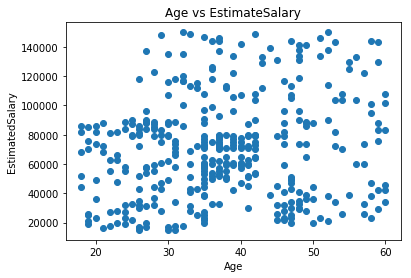

In [14]:
plt.scatter(df['Age'], df['EstimatedSalary'])
plt.title('Age vs EstimateSalary')
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')

There is no Linear relationship between 'Age' and 'EstimatedSalary'. So, we have to use both the columns for the model.

In [15]:
# Seperating as Features and Target
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

**Splitting the dataset into the Training set and Test set**

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [17]:
print(x_train)

[[    38  80000]
 [    48 141000]
 [    53  72000]
 [    25  22000]
 [    56 104000]
 [    53 104000]
 [    36  99000]
 [    37  70000]
 [    24  27000]
 [    48  74000]
 [    40  71000]
 [    47  51000]
 [    31  89000]
 [    27  96000]
 [    23  63000]
 [    27  84000]
 [    58  38000]
 [    46  32000]
 [    41  60000]
 [    37  53000]
 [    32 117000]
 [    38  61000]
 [    43 112000]
 [    36  75000]
 [    33 149000]
 [    40  65000]
 [    23  28000]
 [    42  64000]
 [    40  47000]
 [    33  69000]
 [    60  83000]
 [    37  55000]
 [    58 101000]
 [    32  86000]
 [    42 149000]
 [    40 107000]
 [    42  70000]
 [    31  58000]
 [    47  49000]
 [    34 115000]
 [    20  36000]
 [    35  47000]
 [    36  50000]
 [    48  29000]
 [    20  74000]
 [    40  61000]
 [    49  28000]
 [    39  61000]
 [    30  15000]
 [    58  95000]
 [    60  34000]
 [    41  59000]
 [    37  57000]
 [    37  72000]
 [    29  43000]
 [    47  25000]
 [    40 142000]
 [    42  79000]
 [    41  7100

In [18]:
print(y_train)

[0 0 1 0 1 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0
 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1
 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1
 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1
 0 0 1 0 0 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1
 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0
 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 1 0 1 0
 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1]


In [19]:
print(x_test)

[[    32 150000]
 [    40  60000]
 [    46  23000]
 [    35  79000]
 [    39  75000]
 [    57  74000]
 [    26  16000]
 [    34  72000]
 [    60 108000]
 [    37  62000]
 [    38  50000]
 [    26  84000]
 [    29  28000]
 [    23  48000]
 [    46  82000]
 [    26  52000]
 [    35  25000]
 [    39  77000]
 [    19  70000]
 [    19  21000]
 [    29  80000]
 [    20  23000]
 [    41  79000]
 [    26  72000]
 [    27 137000]
 [    46 117000]
 [    60  46000]
 [    24  23000]
 [    27  57000]
 [    59  42000]
 [    28 123000]
 [    26  35000]
 [    47  47000]
 [    44 139000]
 [    35  73000]
 [    49  88000]
 [    18  82000]
 [    54  70000]
 [    54  26000]
 [    44  39000]
 [    21  88000]
 [    50  44000]
 [    35  91000]
 [    38  55000]
 [    30  79000]
 [    27  88000]
 [    59  83000]
 [    21  16000]
 [    27  31000]
 [    28  87000]
 [    42  80000]
 [    28  59000]
 [    37 144000]
 [    31  76000]
 [    22  18000]
 [    49  65000]
 [    50  88000]
 [    42 104000]
 [    30  8900

In [20]:
print(y_test)

[1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 1 0
 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1
 1 0 0 0 1 0 0 0 1 0 1 1 1 0 0 1 1 0]


**Feature Scaling**

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

**Fitting SVM to the Training set**

In [22]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(x_train, y_train)

SVC()

In [23]:
x_train

array([[ 0.02006504,  0.28035568],
       [ 0.98811533,  2.07538111],
       [ 1.47214047,  0.04494251],
       [-1.23840033, -1.4263898 ],
       [ 1.76255556,  0.9865952 ],
       [ 1.47214047,  0.9865952 ],
       [-0.17354501,  0.83946196],
       [-0.07673999, -0.01391078],
       [-1.33520536, -1.27925657],
       [ 0.98811533,  0.10379581],
       [ 0.2136751 ,  0.01551587],
       [ 0.8913103 , -0.57301706],
       [-0.65757016,  0.5451955 ],
       [-1.04479027,  0.75118203],
       [-1.43201039, -0.2198973 ],
       [-1.04479027,  0.39806227],
       [ 1.95616561, -0.95556346],
       [ 0.79450527, -1.13212334],
       [ 0.31048013, -0.30817724],
       [-0.07673999, -0.51416377],
       [-0.56076513,  1.3691416 ],
       [ 0.02006504, -0.2787506 ],
       [ 0.50409019,  1.22200837],
       [-0.17354501,  0.13322245],
       [-0.4639601 ,  2.31079428],
       [ 0.2136751 , -0.16104401],
       [-1.43201039, -1.24982992],
       [ 0.40728516, -0.19047066],
       [ 0.2136751 ,

In [24]:
x_test

array([[-0.56076513,  2.34022093],
       [ 0.2136751 , -0.30817724],
       [ 0.79450527, -1.39696315],
       [-0.27035004,  0.25092904],
       [ 0.11687007,  0.13322245],
       [ 1.85936059,  0.10379581],
       [-1.1415953 , -1.60294968],
       [-0.36715507,  0.04494251],
       [ 2.14977567,  1.10430178],
       [-0.07673999, -0.24932395],
       [ 0.02006504, -0.6024437 ],
       [-1.1415953 ,  0.39806227],
       [-0.85118022, -1.24982992],
       [-1.43201039, -0.661297  ],
       [ 0.79450527,  0.33920898],
       [-1.1415953 , -0.54359041],
       [-0.27035004, -1.33810986],
       [ 0.11687007,  0.19207575],
       [-1.8192305 , -0.01391078],
       [-1.8192305 , -1.45581645],
       [-0.85118022,  0.28035568],
       [-1.72242547, -1.39696315],
       [ 0.31048013,  0.25092904],
       [-1.1415953 ,  0.04494251],
       [-1.04479027,  1.95767452],
       [ 0.79450527,  1.3691416 ],
       [ 2.14977567, -0.72015029],
       [-1.33520536, -1.39696315],
       [-1.04479027,

**Predicting the Test set results**

In [25]:
# Predicting a new result
print(classifier.predict(sc.transform([[22, 75520]])))

[0]


In [26]:
# Predicting test set results
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]]


**Making the Confusion Matrix**

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[51 10]
 [ 3 28]]


**Visualising the Training set results**

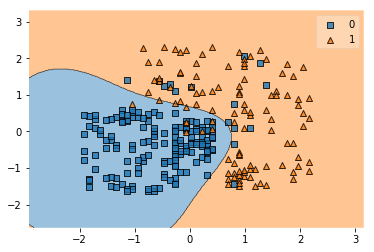

In [28]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train, y_train, clf=classifier)

**Visualising the Test set results**

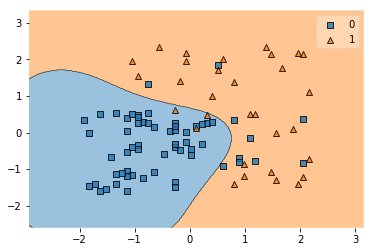

In [29]:
plot_decision_regions(x_test, y_test, clf=classifier)